## Nome: Leonardo Valadão. NUSP: 10299437

# 1º Programa: Zero de funções, bissecção, Newton-Rapshon, Secantes

### Disciplina: Cálculo Numérico com Aplicações em Física. Docente: Arnaldo Gammal.

**a) Resolva numericamente a equação $x^3-cos(x)=0$ usando o método de bissecção. Use um critério de parada escolhendo $\varepsilon$ adequado. Existem outras raízes? Atenção: cos() em radianos!**

Primeiro, vou determinar um algoritmo para o método de bissecção:
 - Encontrar $c = (a+b)/2$
 - Verificar $f(a) . f(c) < 0$
 - Se sim, existe raiz em $(a, c)$
 - Caso contrário, existe raiz em $[c, b)$
 - Repetir até $c \leq \epsilon $

In [1]:
def bissec(f, a, b, epsilon = 0.0001):
    '''Passe f como função; a e b são reais de extremos do intervalo. Epsilon é o intervalo limite.'''
    
    if f(a)*f(b)>0:
        raise Exception('Por favor, passe parâmetros t. q. f(a)*f(b)<0')
    c = a
    # Critério de parada
    while(b-a >= epsilon):
        # Verificação
        c = (a+b)/2
        if f(c)*f(a)<0:
            # Diminuir intervalo para (a,c)
            b = c
        else:
            # Diminuir intervalo para (c,b)
            a = c
    return c

Para analisar a função que devo aplicar, vou gerar um gráfico dela:

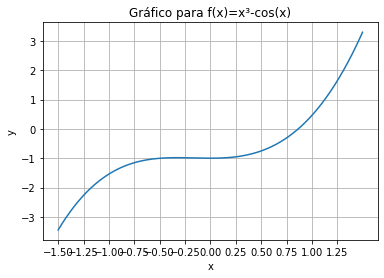

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Definir função e criar intervalo a mostrar
def funcao(x):
    return x**3-np.cos(x)
x = np.arange(-1.5,1.5, step=0.001)
y = [funcao(x) for x in x]

# Gerar gráfico
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Gráfico para f(x)=x³-cos(x)')
ax.set_xticks(np.arange(-1.5, 1.5, 0.25))
ax.grid()

plt.show()

A raiz a ser encontrada parece estar pouco após $0.75$. Nosso intervalo será $(0.75,1.0)$.

Aplicar o método:

In [3]:
# Epsilon escolhido: 1e-9, precisão em nano.

print('Raiz encontrada pelo método de bissecção: {:.10f}'.format(
bissec(funcao, 0.75,1, epsilon=1e-9)
))

Raiz encontrada pelo método de bissecção: 0.8654740332


Pelo gráfico, vemos que não existem outras raízes para a função, pelo menos no intervalo analisado.

**b) Repita o item a) com método de Newton-Raphson.**

Definir algoritmo para o método Newton-Raphson:
 - Definir chute inicial
 - Definir $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$
 - Definir erro como $e = |\frac{x_{n+1}-x_n}{x_n}|$
 - Repetir até que $e$ atinja um $\varepsilon$ pré-definido.

In [4]:
def newton_raphson(f, df, x_0, epsilon=0.0001):
    '''Passe f como função, df como derivada da função, x_0 como chute inicial da raiz, 
    e epsilon como erro máximo'''
    xn = x_0
    e = np.inf
    # Critério de parada pelo erro
    while e >= epsilon:
        # Definir x_n+1
        xnp1 = xn - f(xn)/df(xn)
        # Definir erro
        e = np.abs((xnp1-xn)/(xn))
        xn = xnp1
    return xnp1

Derivada de $f(x)$: $f'(x)=3x^2+sin(x)$

Vamos aplicar o método usando o chute inicial que obtivemos com o método de bissecção: $0.8654740332$.

In [5]:
# Definir derivada da função
def dfuncao(x):
    return 3*x**2 + np.sin(x)

# Aplicar método. Novamente epsilon = 1e-9, precisão em nano.
print('Raiz encontrada com método de Newton-Raphson: {:.10f}'.format(
newton_raphson(funcao, dfuncao, 0.8654740332, epsilon=1e-9)
))

Raiz encontrada com método de Newton-Raphson: 0.8654740331


O método de Newton-Raphson parece ter melhorado a precisão da raiz no último algarismo.

**c) Vamos calcular a distância de ligação da molécula diatômica de $NaCl$ a partir de potencial de interação dos íons $Na^+$ e $Cl^-$. Assumindo que o potencial de interação é $V(r)$ quando os dois íons estão separados pela distância $r$, a distância de ligação $r_{eq}$ é a de equilíbrio quando o potencial $V(r)$ é mínimo. Pode-se modelar o potencial entre os íons como**

<center>$V(r)=-\frac{e^2}{4\pi\epsilon_0 r} + V_0 e^{\frac{-r}{r_0}}$</center>

**onde $e$ é a carga do elétorn, $\epsilon_0$ é a permissividade do vácuo e $V_0$ e $r_0$ são parâmetros de energia e de alcance repulsivos, respectivamente. O primeiro termo vem da atração Coulombiaba de longo alcance entre os dois íons e o segundo termo é resultado da repulsão eletrônica de curto alcance do sistema. Vamos usar $V_0 = 1.09 \times 10³ eV$ e $r_0 = 0.330 A$, que são os parâmetros cristalinos.**

**No equilíbrio, a força entre os dois íons,**

<center>$F(r) = - \frac{dV(r)}{dr} = - \frac{e^2}{4\pi\epsilon_0 r^2}+ \frac{V_0}{r_0} e^\frac{-r}{r_0}$</center>

**é zero.**

**i) Faça os gráficos de $V(r) \times r$ e $F(r) \times r$.**

Vamos considerar $\frac{e^2}{4\pi\epsilon_0}=14.4 eV A$

In [6]:
# Definir constantes
V_0 = 1.09e3
r_0 = 0.33

In [7]:
# Definir funções
def V_r(x, V_0 = V_0, r_0 = r_0, perm = 14.4):
    return -(perm/x) + V_0*np.exp(-x/r_0)

def F_r(x, V_0 = V_0, r_0 = r_0, perm=14.4):
    return -(perm/x**2)+ (V_0/r_0) * np.exp(-x/r_0)

In [8]:
# Criar intervalos
x = np.arange(0.1, 50, step=1e-3)
Vy = [V_r(i) for i in x]
Fy = [F_r(i) for i in x]

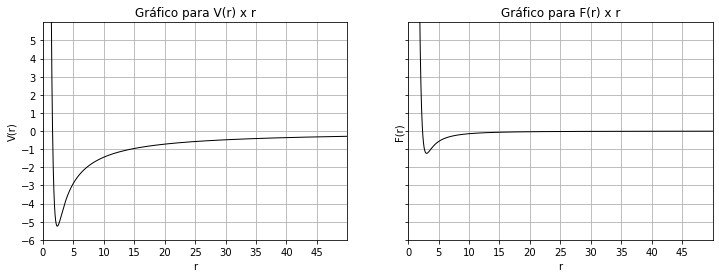

In [9]:
# Gerar gráfico

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,4))

ax1.plot(x,Vy, lw=1, color='black')
ax1.set_ylim(-6,6)
ax1.set_xlim(0,50)
ax1.set_title('Gráfico para V(r) x r')
ax1.set_xlabel('r')
ax1.set_ylabel('V(r)')
ax1.set_yticks(np.arange(-6,6, 1))
ax1.set_xticks(np.arange(0,50,5))
ax1.grid()

ax2.plot(x, Fy, lw=1, color='black')
ax2.set_title('Gráfico para F(r) x r')
ax2.set_xlim(0,50)
ax2.set_xlabel('r')
ax2.set_ylabel('F(r)')
ax2.set_yticks(np.arange(-6,6, 1))
ax2.set_xticks(np.arange(0,50,5))
ax2.grid()

plt.show()

**ii) Use o método de secantes e encontre o ponto de equilíbrio $r=r_{eq}$ em A, que é a solução de $F(r)=0$ na região onde $V(r)$ é mínimo. Em unidades convenientes, $e^2/4\pi\epsilon_0 = 14.4 eV A$.**

Vamos ampliar o gráfico acima para melhor analisar onde possa estar nossa raiz.

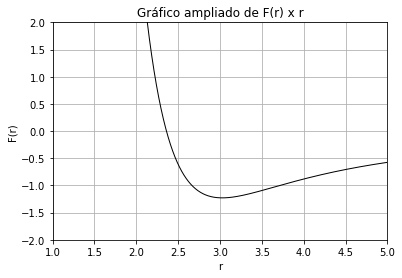

In [10]:
# Novo gráfico para F(r) x r
plt.plot(x, Fy, lw=1, color='black')
plt.xlim(1,5)
plt.ylim(-2,2)
plt.title('Gráfico ampliado de F(r) x r')
plt.xlabel('r')
plt.ylabel('F(r)')
plt.grid()

Pelo gráfico, vemos que a raiz parece estar entre $2$ e $2.5$. Vamos usar o método de secantes para descobrir a raiz.

Método de secantes:
 - Definir $x_n$ como chute inicial
 - Calcular $x_{n+1}=x_n- \frac{(x_n - x_{n-1}) f(x_n)}{f(x_n) - f(x_{n-1})}$
 - Repetir até o valor convergir.

In [11]:
# Criar algoritmo do método secante
def secante(f, xnm1, x_n, n_it=10**5):
    '''f é uma função \n
    xnm1 e x_n são pontos tal que a raiz esteja em (xnm1, x_n) \n
    n_it é o número de iterações'''
    # Inicializar um valor que guarda x_n pro critério de parada
    # Ele inicializa com infinito pois o valor é arbitrário
    x_g = np.inf
    # Enquanto não convergir...
    while x_n != x_g:
        x_g = x_n
        # Calcular
        xnp1 = x_n - ((x_n-xnm1)*f(x_n))/(f(x_n)-f(xnm1))
        x_n = xnp1
    return x_n

In [12]:
# Aplicar método
print('Raiz encontrada com método de secantes para F(r)=0: r_eq = {:.10f} A'.format(
secante(F_r, 2, 2.5)
))

Raiz encontrada com método de secantes para F(r)=0: r_eq = 2.3605384842 A
